In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score,confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('liver.csv')

In [4]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [5]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [6]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [8]:
df['Dataset'].value_counts()

Dataset
1    416
2    167
Name: count, dtype: int64

In [9]:
df['Dataset']=df['Dataset'].apply(lambda x: 0 if x==1 else 1)

In [10]:
df['Dataset'].value_counts()

Dataset
0    416
1    167
Name: count, dtype: int64

In [11]:
df['Albumin_and_Globulin_Ratio']=df['Albumin_and_Globulin_Ratio'].fillna(round(df['Albumin_and_Globulin_Ratio'].mean(),2))

In [12]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [13]:
lb = LabelEncoder()
df['Gender']=lb.fit_transform(df['Gender'])

In [14]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,0
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,0
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,0
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,0
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,0


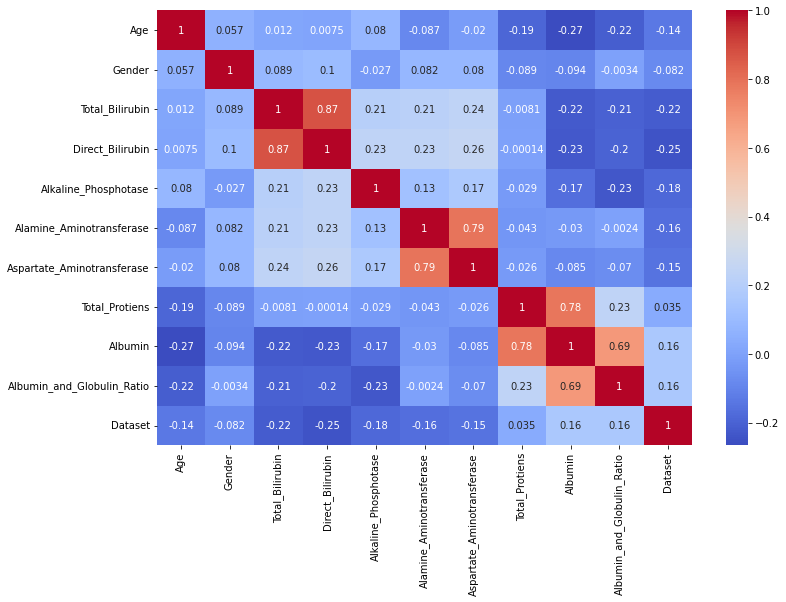

In [15]:
corr_matrix = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.show()

In [16]:
X = df.drop(['Dataset'],axis=1)
y = df['Dataset']

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [18]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
models = {
    'LogisticRegression': {
        'model': LogisticRegression(),
        'params': {
            'C': [0.01, 0.1, 1, 10, 100],
            'solver': ['liblinear', 'lbfgs']
        }
    },
    'RandomForest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [5, 10, 20, None],
            'min_samples_split': [2, 5, 10]
        }
    },
    'SVC': {
        'model': SVC(),
        'params': {
            'C': [0.01, 0.1, 1, 10, 100],
            'kernel': ['linear', 'rbf', 'poly'],
            'gamma': ['scale', 'auto']
        }
    }
}

In [20]:
best_models = {}
for model_name, config in models.items():
    print(f"Training {model_name}...")
    clf = GridSearchCV(config['model'], config['params'], cv=5, scoring='accuracy', n_jobs=-1)
    clf.fit(X_train_scaled, y_train)
    best_models[model_name] = clf.best_estimator_
    print(f"Best parameters for {model_name}: {clf.best_params_}")
    print(f"Training accuracy: {clf.best_score_:.4f}")

# Evaluate the models on the test set
for model_name, model in best_models.items():
    print(f"\nEvaluating {model_name} on test data...")
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1]) if hasattr(model, "predict_proba") else None
    print(f"Test accuracy: {accuracy:.4f}")
    if roc_auc:
        print(f"ROC AUC Score: {roc_auc:.4f}")
    print(classification_report(y_test, y_pred))

# Compare models and find the best one
best_model_name = max(best_models, key=lambda model_name: accuracy_score(y_test, best_models[model_name].predict(X_test)))
print(f"\nBest model: {best_model_name}")

Training LogisticRegression...
Best parameters for LogisticRegression: {'C': 1, 'solver': 'liblinear'}
Training accuracy: 0.7103
Training RandomForest...
Best parameters for RandomForest: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
Training accuracy: 0.7016
Training SVC...
Best parameters for SVC: {'C': 0.01, 'gamma': 'scale', 'kernel': 'linear'}
Training accuracy: 0.7060

Evaluating LogisticRegression on test data...
Test accuracy: 0.7607
ROC AUC Score: 0.7540
              precision    recall  f1-score   support

           0       0.76      1.00      0.86        87
           1       1.00      0.07      0.12        30

    accuracy                           0.76       117
   macro avg       0.88      0.53      0.49       117
weighted avg       0.82      0.76      0.67       117


Evaluating RandomForest on test data...
Test accuracy: 0.7350
ROC AUC Score: 0.8034
              precision    recall  f1-score   support

           0       0.80      0.85      0.83     

Feature Importance

In [21]:
X_scaled=scaler.fit_transform(X)
model=LogisticRegression()
model.fit(X_scaled,y)


LogisticRegression()

In [22]:
importance = model.coef_[0]

In [23]:
feature_importance=pd.DataFrame({
    'Features' : X.columns,
    'Importance' : importance
})

feature_importance=feature_importance.sort_values(by='Importance',ascending=False)

feature_importance

,Features,Importance
8,Albumin,1.009010
9,Albumin_and_Globulin_Ratio,0.720003
1,Gender,-0.253754
7,Total_Protiens,-0.722780
6,Aspartate_Aminotransferase,-0.952460
0,Age,-1.087354
2,Total_Bilirubin,-1.266941
5,Alamine_Aminotransferase,-1.734884
4,Alkaline_Phosphotase,-1.805820
3,Direct_Bilirubin,-2.603687


In [24]:
model.fit(X_train_scaled,y_train)
model.score(X_test_scaled,y_test)

0.7606837606837606

In [25]:
import pickle

In [26]:
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(lb,open('label_encoder.pkl','wb'))
pickle.dump(model,open('logistic_regression.pkl','wb'))